In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read excel file with sheet name
dict_df = pd.read_excel('RFM_Dataset.xlsx', sheet_name= ["Orders", "Return","Segmentation"])


In [3]:
dict_df

{'Orders':       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
 0        646  CA-2017-126221 2017-12-30 2018-01-05  Standard Class   
 1        907  CA-2017-143259 2017-12-30 2018-01-03  Standard Class   
 2        908  CA-2017-143259 2017-12-30 2018-01-03  Standard Class   
 3        909  CA-2017-143259 2017-12-30 2018-01-03  Standard Class   
 4       1297  CA-2017-115427 2017-12-30 2018-01-03  Standard Class   
 ...      ...             ...        ...        ...             ...   
 9989    1760  CA-2014-141817 2014-01-05 2014-01-12  Standard Class   
 9990     740  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   
 9991     741  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   
 9992     742  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   
 9993    7981  CA-2014-103800 2014-01-03 2014-01-07  Standard Class   
 
      Customer ID      Channel  Postal Code       Product ID    Sales  \
 0       CC-12430  Home Office        47201  OFF-AP-10002457  2

In [4]:
# Get DataFrame from Dict
orders = dict_df.get('Orders')
returns = dict_df.get('Return')
segments = dict_df.get('Segmentation')

In [5]:
# information of each dataframe 
print(orders.info())
print(returns.info())
print(segments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    

In [6]:
orders.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926
5,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.720,2,7.1225
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096
7,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,FUR-CH-10002880,393.568,4,109.4611
8,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,TEC-PH-10002563,302.376,3,93.2326
9,2875,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Consumer,10035,OFF-FA-10002988,6.030,3,1.0251


In [7]:
#Remove the returned orders from the orders table.

df_not_return = orders[~orders['Order ID'].isin(returns[returns['Returned'] == 'Yes']['Order ID'])]

df_not_return.shape

(9194, 12)

In [8]:
# Remove duplicate rows from the orders DataFrame
orders.drop_duplicates(inplace=True)

In [9]:
#Calculating RFM of each customer

recent_date = pd.to_datetime("2017-12-31")

#create new dataframe concluding R, F, M group by each customer ID
df_rfm = df_not_return.groupby('Customer ID', as_index=False).\
            agg({'Order Date' : lambda date: (recent_date - date.max()).days,
                 'Order ID' : 'nunique',
                 'Sales' : 'sum'})

# Change the name of columns from dataframe df_rfm
df_rfm.columns = ['Customer ID','recency', 'frequency', 'monetary']
 
df_rfm

,Customer ID,recency,frequency,monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,483,5,5073.975
4,AB-10015,416,3,886.156
...,...,...,...,...
786,XP-21865,83,9,2110.726
787,YC-21895,5,4,5438.650
788,YS-21880,10,8,6720.444
789,ZC-21910,55,12,7892.998


In [10]:
score_recency = [5,4,3,2,1]
score = [1,2,3,4,5]

#Create a new column to store the quintile score of recency
df_rfm['recency_score'] = pd.qcut(df_rfm.recency, q=5, labels = score_recency)

#Create a new column to store the quintile score of frequency
df_rfm['frequency_score'] = pd.qcut(df_rfm.frequency, q=5, labels = score)

#Create a new column to store the quintile score of monetary
df_rfm['monetary_score'] = pd.qcut(df_rfm.monetary, q=5, labels = score)

df_rfm

,Customer ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,AA-10315,185,5,5563.560,2,2,5
1,AA-10375,20,9,1056.390,5,5,2
2,AA-10480,260,4,1790.512,2,1,3
3,AA-10645,483,5,5073.975,1,2,5
4,AB-10015,416,3,886.156,1,1,2
...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3
787,YC-21895,5,4,5438.650,5,1,5
788,YS-21880,10,8,6720.444,5,4,5
789,ZC-21910,55,12,7892.998,4,5,5


In [11]:
#Concatnation r,f,m into rfm column as string type
df_rfm['rfm'] = df_rfm['recency_score'].astype(str) +\
                df_rfm['frequency_score'].astype(str) + \
                df_rfm['monetary_score'].astype(str)

df_rfm['rfm'] = df_rfm['rfm'].astype(int)

df_rfm

,Customer ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm
0,AA-10315,185,5,5563.560,2,2,5,225
1,AA-10375,20,9,1056.390,5,5,2,552
2,AA-10480,260,4,1790.512,2,1,3,213
3,AA-10645,483,5,5073.975,1,2,5,125
4,AB-10015,416,3,886.156,1,1,2,112
...,...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3,353
787,YC-21895,5,4,5438.650,5,1,5,515
788,YS-21880,10,8,6720.444,5,4,5,545
789,ZC-21910,55,12,7892.998,4,5,5,455


In [12]:
rfm_segment_map = {}

for row in segments.itertuples(index=False):
    segment = row.Segment
    rfm_score_ranges = [
        int(score.strip())
        for score in row._1.split(',')
        ]
    for rfm_score_range in rfm_score_ranges:
        rfm_segment_map[rfm_score_range] = segment

rfm_segment_map

{555: 'Champions',
 554: 'Champions',
 544: 'Champions',
 545: 'Champions',
 454: 'Champions',
 455: 'Champions',
 445: 'Champions',
 543: 'Loyal',
 444: 'Loyal',
 435: 'Loyal',
 355: 'Loyal',
 354: 'Loyal',
 345: 'Loyal',
 344: 'Loyal',
 335: 'Loyal',
 553: 'Potential Loyalist',
 551: 'Potential Loyalist',
 552: 'Potential Loyalist',
 541: 'Potential Loyalist',
 542: 'Potential Loyalist',
 533: 'Potential Loyalist',
 532: 'Potential Loyalist',
 531: 'Potential Loyalist',
 452: 'Potential Loyalist',
 451: 'Potential Loyalist',
 442: 'Potential Loyalist',
 441: 'Potential Loyalist',
 431: 'Potential Loyalist',
 453: 'Potential Loyalist',
 433: 'Potential Loyalist',
 432: 'Potential Loyalist',
 423: 'Potential Loyalist',
 353: 'Potential Loyalist',
 352: 'Potential Loyalist',
 351: 'Potential Loyalist',
 342: 'Potential Loyalist',
 341: 'Potential Loyalist',
 333: 'Potential Loyalist',
 323: 'Potential Loyalist',
 512: 'New Customers',
 511: 'New Customers',
 422: 'New Customers',
 421: 

In [13]:
segment_new = pd.DataFrame.from_dict(rfm_segment_map, orient="index", columns=["Segment"])

segment_new = segment_new.reset_index() # reset index to move dictionary keys to a column
segment_new = segment_new.rename(columns={'index': 'rfm'}) # rename column to 'rfm'

segment_new

,rfm,Segment
0,555,Champions
1,554,Champions
2,544,Champions
3,545,Champions
4,454,Champions
...,...,...
120,112,Lost customers
121,121,Lost customers
122,131,Lost customers
123,141,Lost customers


In [14]:
#Joininig df_rfm and segment_new
rfm_merge = df_rfm.merge(segment_new, on = 'rfm', how = 'inner')

rfm_merge = rfm_merge.sort_values('Customer ID')
rfm_merge

,Customer ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm,Segment
0,AA-10315,185,5,5563.560,2,2,5,225,At Risk
2,AA-10375,20,9,1056.390,5,5,2,552,Potential Loyalist
4,AA-10480,260,4,1790.512,2,1,3,213,About To Sleep
13,AA-10645,483,5,5073.975,1,2,5,125,At Risk
18,AB-10015,416,3,886.156,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
632,XP-21865,83,9,2110.726,3,5,3,353,Potential Loyalist
790,YC-21895,5,4,5438.650,5,1,5,515,Promising
704,YS-21880,10,8,6720.444,5,4,5,545,Champions
66,ZC-21910,55,12,7892.998,4,5,5,455,Champions


C:\Users\PC\AppData\Local\Temp\ipykernel_17572\3646394159.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_merge[i])
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

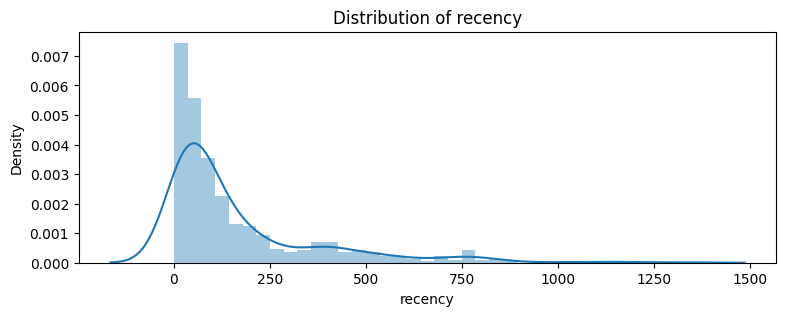

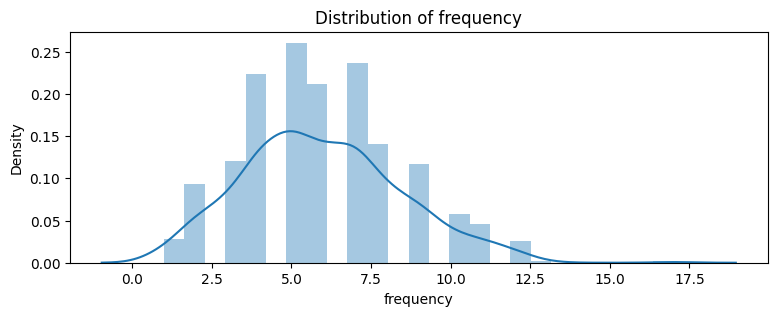

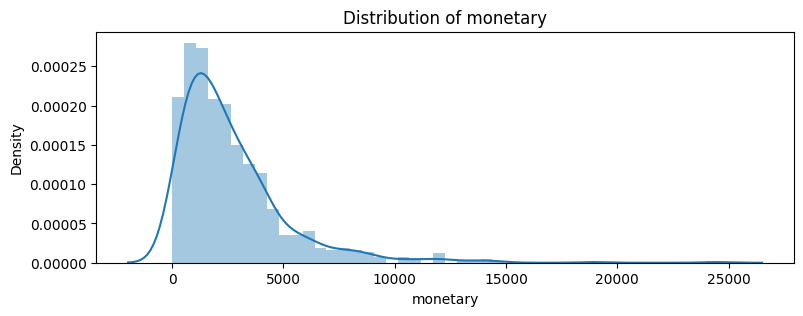

In [18]:
colname = ['recency', 'frequency', 'monetary']

for i in colname:
    fig, ax = plt.subplots(figsize = (9,3))
    sns.distplot(rfm_merge[i])
    ax.set_title(f"Distribution of {i}")
    plt.show

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


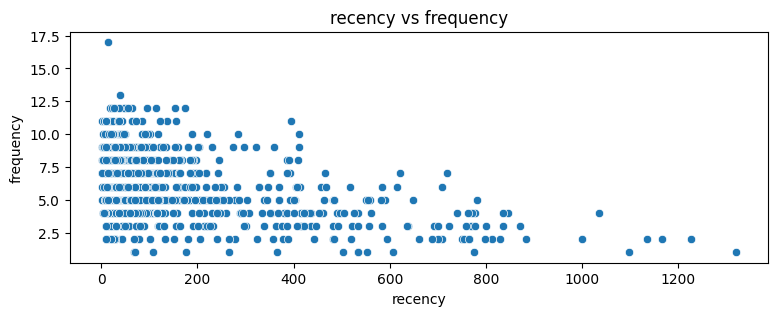

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


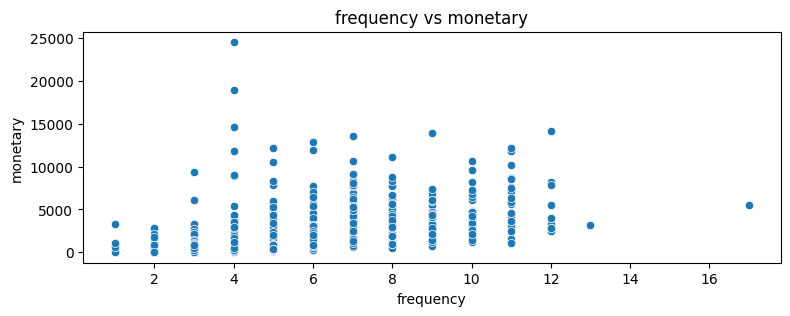

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


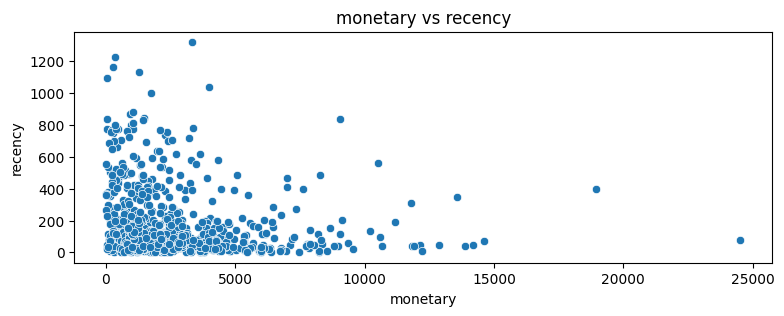

In [19]:
colname1 = ['recency', 'frequency', 'monetary','recency']

for i in range(3):
    fig, ax = plt.subplots(figsize = (9,3))
    sns.scatterplot(x= colname1[i], y=colname1[i+1], 
                data=rfm_merge)
    ax.set_title(f"{colname1[i]} vs {colname1[i+1]}")
    plt.show()

In [20]:
rfm1 = rfm_merge
rfm1['monetary1'] = rfm1['monetary']
aggta = rfm_merge.groupby('Segment', as_index=False).agg({
                'Customer ID': 'count',
                'recency':'mean',
                'frequency': 'mean',
                'monetary': 'mean',
                'monetary1': 'sum'
})
aggta.columns = ['segment',"customer_num", "r_avg", "f_avg", "m_avg", "m_sum"]
aggta = aggta.sort_values('m_sum', ascending = False)
aggta

,segment,customer_num,r_avg,f_avg,m_avg,m_sum
1,At Risk,96,259.041667,7.260417,4020.800897,385996.8861
3,Champions,71,28.521127,9.830986,5381.642068,382096.5868
6,Loyal,62,60.725806,8.161290,4365.809926,270680.2154
7,Need Attention,72,50.138889,6.527778,3602.949892,259412.3922
10,Promising,63,35.253968,4.507937,3568.315802,224803.8955
9,Potential Loyalist,113,45.185841,7.079646,1689.778144,190944.9303
2,Cannot Lose Them,36,496.527778,4.694444,4173.053928,150229.9414
4,Hibernating customers,90,190.044444,4.733333,1221.780567,109960.2510
5,Lost customers,83,557.963855,2.975904,653.785849,54264.2255
0,About To Sleep,44,135.204545,4.750000,1075.229936,47310.1172


In [31]:
print(rfm_merge.columns)


Index(['Customer ID', 'recency', 'frequency', 'monetary', 'recency_score',
       'frequency_score', 'monetary_score', 'rfm', 'Segment', 'monetary1'],
      dtype='object')


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


TypeError: Neither the `x` nor `y` variable appears to be numeric.

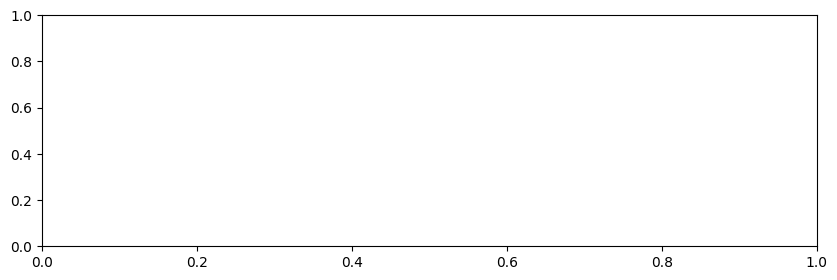

In [32]:
# The number of customers segmented by segment
segment_order = ['Champions', 'Loyal', 'Potential Loyalist', 'New Customers', 'Promising', 
                 'Need Attention', 'About To Sleep', 'At Risk', 'Cannot Lose Them', 
                 'Hibernating customers','Lost customers']

cols = ['Customer ID', 'r_avg', 'f_avg', 'm_avg']
col_interpret = ['Customer Count', 'mean of Recency', 'mean of Frequency', 'mean of Total sales']

for i in range(4):
    fig, ax = plt.subplots(figsize=(10, 3))
    sns.barplot(x='Segment', y=cols[i], data=rfm_merge, order=segment_order)
    plt.title(f'RFM Segments of {col_interpret[i]}')
    plt.xticks(rotation=40)
    plt.show()


# Purpose: Identify customer segments to focus on in order to develop appropriate strategies (according to the 80/20 rule)

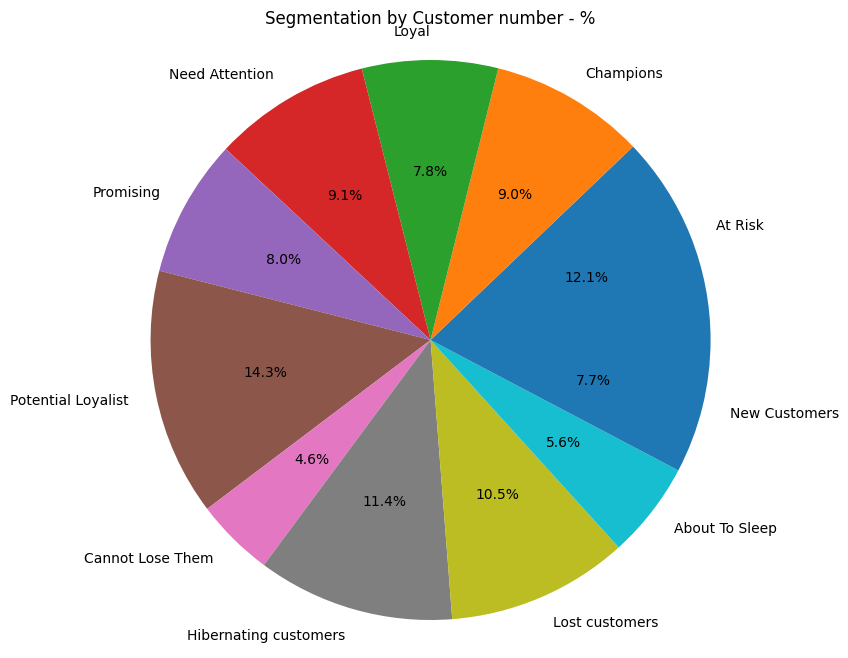

In [27]:
plt.figure(figsize=(9,8))
plt.pie(aggta['customer_num'], labels=aggta['segment'], autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Segmentation by Customer number - %')
plt.show()